### 사용할 라이브러리들을 정의한다.

In [1]:
import warnings; warnings.filterwarnings("ignore");

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오고 및 학습 / 시험 세트를 분리한다.

In [2]:
wine = pd.read_csv('wine/winequality-red.csv', delimiter=',')
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
print(wine['quality'].value_counts())

# Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis=1)
y = wine['quality']
# Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0    1382
1     217
Name: quality, dtype: int64


### 데이터 정규화를 수행한다.

In [3]:
# Applying Standard scaling to get optimized result
sc = RobustScaler()
# sc = StandardScaler()
# sc = MinMaxScaler()
# sc = MaxAbsScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 다양한 모델을 이용한 분류 태스크를 수행한다.

#### 1. 로지스틱 회귀분석

In [4]:
lr_model = LogisticRegression()
# fit the lr_model with data
lr_model.fit(X_train,y_train)
# predict
y_pred = lr_model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[265   8]
 [ 37  10]]
Accuracy: 0.859375
Precision: 0.5555555555555556
Recall: 0.2127659574468085


#### 분류 정확도는 85% 로 높은 편이지만, 정밀도와 재현율이 낮은 편이다. 즉, 다양한 환경에서 사용하기에는 부족하다.

#### 2. K-최근접 이웃 분류기

In [5]:
knn = KNeighborsClassifier(3) # default 5
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[259  14]
 [ 25  22]]
Accuracy: 0.878125
Precision: 0.6111111111111112
Recall: 0.46808510638297873


#### 분류 정확도는 87%로 높은 편이고, 정밀도와 재현율도 낮지 않다. 다만, 여전히 정밀도가 80% 이하이므로 여러 환경에서 사용하기 적합하지 않다.

#### 3. Linear 커널을 이용한 서포트 벡터 분류기

In [6]:
lin_svc = svm.LinearSVC(C=0.5)
lin_svc.fit(X_train,y_train)
y_pred = lin_svc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[270   3]
 [ 40   7]]
Accuracy: 0.865625
Precision: 0.7
Recall: 0.14893617021276595


#### 정확도와 정밀도 모두 준수한 편이지만, 재현율이 현저히 낮다.

#### 4. 다항 커널을 이용한 서포트 벡터 분류기

In [7]:
svc = svm.SVC(C=1.2, gamma='auto', kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[271   2]
 [ 37  10]]
Accuracy: 0.878125
Precision: 0.8333333333333334
Recall: 0.2127659574468085


#### 정확도와 재현율은 높지만, SVM 모형의 특성 때문인지 재현율이 낮다.

#### 5. 의사 결정 나무 분류기

In [8]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[248  25]
 [ 22  25]]
Accuracy: 0.853125
Precision: 0.5
Recall: 0.5319148936170213


#### 가장 높은 재현율을 보이고 있지만, 낮은 정밀도로 인해 실 사용에 어려움을 겪을 수 있다.

#### 6. 랜덤 포레스트 분류기

In [9]:
rfc = RandomForestClassifier(n_estimators=100, ccp_alpha=0.5)
# fit the rfc with data
rfc.fit(X_train,y_train)
# predict
y_pred = rfc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[273   0]
 [ 47   0]]
Accuracy: 0.853125
Precision: 0.0
Recall: 0.0


#### 높은 정확도를 가졌지만, 모든 데이터를 0번으로 예측하는 문제가 발생한다. 이는 굉장히 큰 이슈이며 해결되지 않으면 사용할 수 없다.

#### 7. 가우시안 나이브 베이즈 분류기

In [10]:
gnb = GaussianNB()
# fit the rfc with data
gnb.fit(X_train,y_train)
# predict
y_pred = gnb.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[233  40]
 [ 10  37]]
Accuracy: 0.84375
Precision: 0.4805194805194805
Recall: 0.7872340425531915


#### 모두 0번으로 예측해버리는 문제가 발생한다. 앞선 랜덤 포레스트와 같은 문제점이다.

### GridSearchCV 를 통한 최적 파라미터 그리드 서치를 이용하여 모델을 더 최적으로 훈련한다.

In [11]:
knn_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [12]:
grid_knn = GridSearchCV(knn, param_grid=knn_params, scoring='accuracy', cv=5)
grid_knn.fit(X_train, y_train)

y_pred = grid_knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[252  21]
 [ 18  29]]
Accuracy: 0.878125
Precision: 0.58
Recall: 0.6170212765957447


In [13]:
svc_params = {
    'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    'kernel':["linear", "rbf", "sigmoid", "poly"],
    'gamma': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    'decision_function_shape': ['ovo', 'ovr']}

In [14]:
grid_svc = GridSearchCV(svc, param_grid=svc_params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

y_pred = grid_svc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[269   4]
 [ 29  18]]
Accuracy: 0.896875
Precision: 0.8181818181818182
Recall: 0.3829787234042553


In [15]:
dt_params = {
    'max_depth': [3, None],
}

In [16]:
grid_dt = GridSearchCV(dt, param_grid=dt_params, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

y_pred = grid_dt.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[263  10]
 [ 36  11]]
Accuracy: 0.85625
Precision: 0.5238095238095238
Recall: 0.23404255319148937


In [17]:
rfc_params = {
    'n_estimators': [50, 100, 200, 250],
    'ccp_alpha': [0.1, 0.25, 0.5, 0.75, 1]
}

In [18]:
grid_rfc = GridSearchCV(rfc, param_grid=rfc_params, scoring='accuracy', cv=5)
grid_rfc.fit(X_train, y_train)

y_pred = grid_rfc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[273   0]
 [ 47   0]]
Accuracy: 0.853125
Precision: 0.0
Recall: 0.0


#### 정확도, 정밀도, 재현율을 모두 고려했을 때, 가장 좋은 모형은 SVC이다. 랜덤성을 고려하였을 때, 88~92% 정도의 정확도를 보여주고, 최적 파라미터는 다음과 같다

In [19]:
grid_svc

GridSearchCV(cv=5, estimator=SVC(C=1.2, gamma='auto'),
             param_grid={'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                               1.5],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3,
                                   1.4, 1.5],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

#### 검증

In [20]:
svc = svm.SVC(C=1.2, gamma='auto', kernel='rbf', probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[271   2]
 [ 37  10]]
Accuracy: 0.878125
Precision: 0.8333333333333334
Recall: 0.2127659574468085


#### 동일한 인자를 설정했음에도 결과가 다르다. 즉, 일부 랜덤성이 존재한다.

Text(0.5, 427.9555555555555, 'Predicted label')

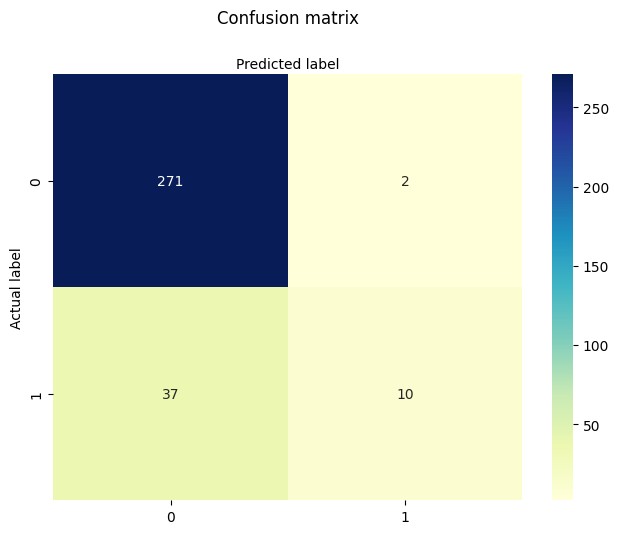

In [21]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

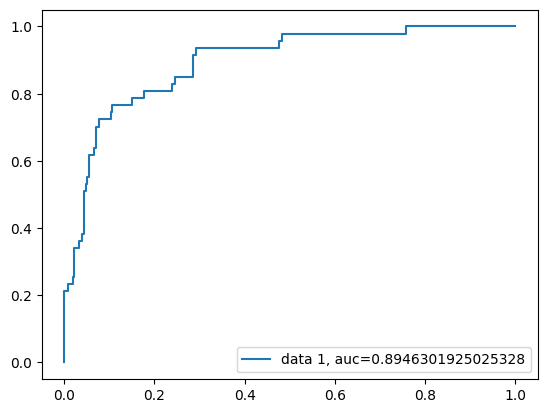

In [22]:
y_pred_proba = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()